In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["axes.labelsize"] = 14

## HCP 100 Subjects CNN with 3 Pipelines

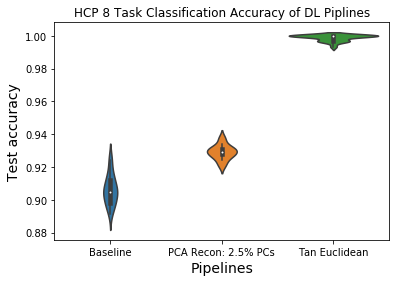

In [2]:
baseline = pd.read_csv('HCP100_base_E200_LR0.001_R1_S0_Y1_20.csv')
tan_euclidean = pd.read_csv('HCP100_Taneuclid_E200_LR0.001_R1_S0_Y1_20.csv')
pca_recon = pd.read_csv('HCP100_recon_0.025_E200_LR0.001_R0_S0_Y1.csv')
df = pd.concat([baseline['Accuracy'], pca_recon['Accuracy'],
                tan_euclidean['Accuracy']], axis=1,
               keys=['Baseline', 'PCA Recon: 2.5% PCs', 'Tan Euclidean'])
df = df.melt(var_name='Pipelines', value_name='Test accuracy')
ax = sns.violinplot(x="Pipelines", y="Test accuracy", data=df).set_title(
    'HCP 8 Task Classification Accuracy of DL Piplines')
fig = ax.get_figure()
plt.show()

## Classification on Closest FC without DL

In [12]:
distances = pd.read_csv('distances.csv', names=["Type", "Accuracy"])
new = distances["Type"].str.rsplit("_", n = 1, expand = True) 
distances['Tangent Reference'] = new[0]
distances['Distance'] = new[1]
distances.drop(columns =["Type"], inplace = True) 
distances.head()

,Accuracy,Tangent Reference,Distance
0,0.881579,euclid,corr
1,0.865132,euclid,cosine
2,0.148026,euclid,euclidean
3,0.851974,harmonic,corr
4,0.891447,harmonic,cosine


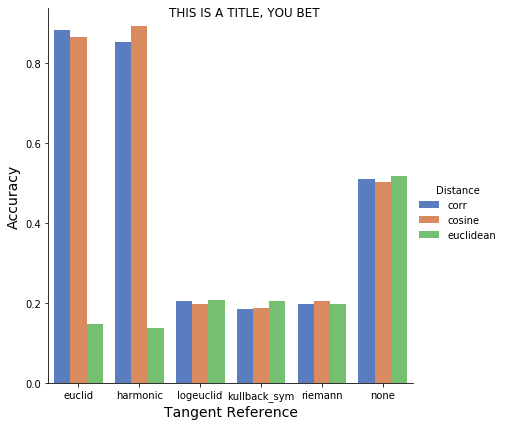

In [22]:
ref_plot = sns.catplot(x="Tangent Reference", y="Accuracy", hue="Distance", data=distances,
                height=6, kind="bar", palette="muted").set(ylim=(0, 1)).set_title(
    'HCP 8 Task Classification Accuracy of DL Piplines')
ref_plot.fig.suptitle('Classification accuracy of ')
plt.savefig('distance_classification.png')
plt.show()